---
title: 'test'
format: html
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary cache directory at /tmp/matplotlib-c85owgi7 because the default path (/home/jovyan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
airbnb = pd.read_csv('airbnb.csv')
blueprinty = pd.read_csv('blueprinty.csv')

In [3]:
airbnb.columns

Index(['Unnamed: 0', 'id', 'days', 'last_scraped', 'host_since', 'room_type',
       'bathrooms', 'bedrooms', 'price', 'number_of_reviews',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [4]:
blueprinty.columns

Index(['patents', 'region', 'age', 'iscustomer'], dtype='object')

In [5]:
blueprinty.head()

,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0


In [6]:
blueprint_hist = pd.pivot_table(blueprinty, index='iscustomer', values='patents', aggfunc='mean').head()
blueprint_hist

,patents
iscustomer,
0,3.473013
1,4.133056


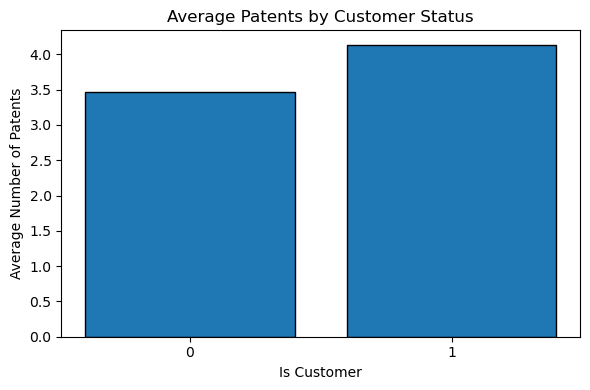

In [7]:
blueprint_hist = blueprint_hist.reset_index()

# Create a histogram-style bar chart
plt.figure(figsize=(6, 4))
plt.bar(blueprint_hist['iscustomer'].astype(str), blueprint_hist['patents'], edgecolor='black')

# Add labels and title
plt.xlabel('Is Customer')
plt.ylabel('Average Number of Patents')
plt.title('Average Patents by Customer Status')

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
blueprinty['age'].describe()

count    1500.000000
mean       26.357667
std         7.242528
min         9.000000
25%        21.000000
50%        26.000000
75%        31.625000
max        49.000000
Name: age, dtype: float64

iscustomer,0,1,Total
age_bins,,,
"[0, 20)",205,98,303
"[20, 30)",496,213,709
"[30, 40)",291,142,433
"[40, 50)",27,28,55
Total,1019,481,1500


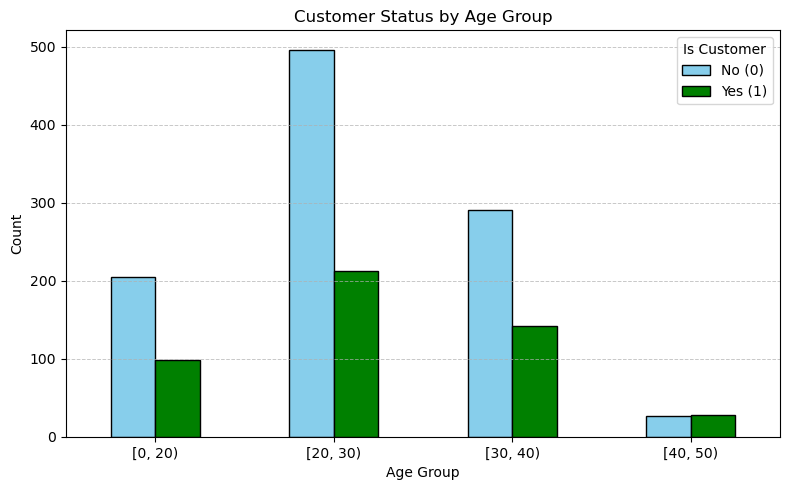

In [9]:
blueprinty['age_bins']= pd.cut(blueprinty['age'], bins=[0, 20, 30, 40, 50], right=False)
blueprint_hist_age =pd.crosstab(index=blueprinty['age_bins'], columns=blueprinty['iscustomer'],margins=True,margins_name='Total')
display(blueprint_hist_age)


plot_data_age = blueprint_hist_age.drop(index='Total', columns='Total')

# Plot
plot_data_age.plot(
    kind='bar',
    stacked=False,
    figsize=(8, 5),
    edgecolor='black',
    color =( 'skyblue','green',),
)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Customer Status by Age Group')
plt.legend(title='Is Customer', labels=['No (0)', 'Yes (1)'])

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

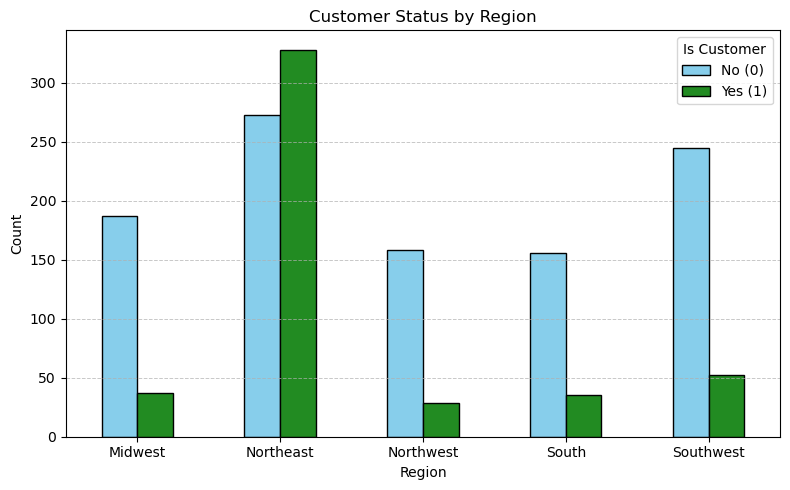

In [10]:
blueprint_hist_region= pd.crosstab(index=blueprinty['region'], columns=blueprinty['iscustomer'],margins=True,margins_name='Total')
blueprint_hist_region

plot_data_region = blueprint_hist_region.drop(index='Total', columns='Total')

# Plot
plot_data_region.plot(
    kind='bar',
    stacked=False,
    figsize=(8, 5),
    edgecolor='black',
    color=['skyblue','forestgreen']
)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Customer Status by Region')
plt.legend(title='Is Customer', labels=['No (0)', 'Yes (1)'])

plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from math import factorial

def poisson_distro(lmbda, y):
    return (np.exp(-lmbda) * (lmbda ** y)) / factorial(y)

def poisson_likelihood(lmbda, y_array):
    return np.prod([poisson_distro(lmbda, y_i) for y_i in y_array])

from scipy.special import gammaln

def poisson_log_likelihood(lmbda, y_array):
    y_array = np.array(y_array)
    return np.sum(-lmbda + y_array * np.log(lmbda) - gammaln(y_array + 1))



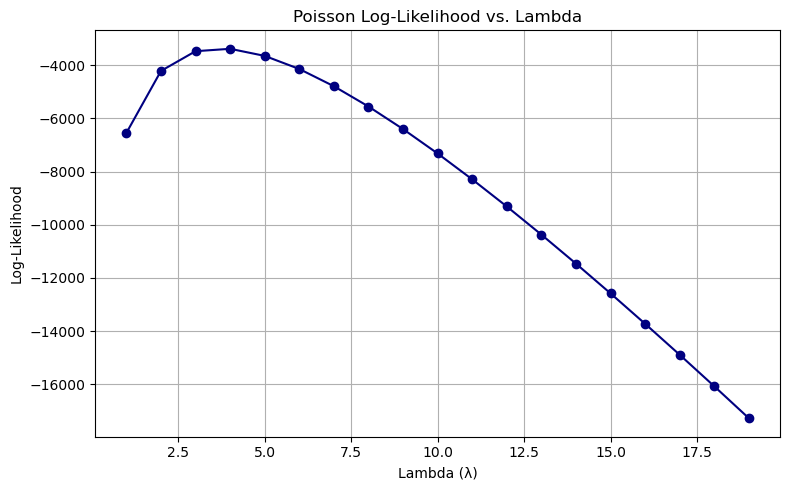

In [12]:
# Evaluate log-likelihoods across lambda values
lambda_vals = np.arange(1, 20)
log_likelihoods = [poisson_log_likelihood(lmbda, blueprinty['patents'].values) for lmbda in lambda_vals]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lambda_vals, log_likelihoods, marker='o', color='navy')
plt.title("Poisson Log-Likelihood vs. Lambda")
plt.xlabel("Lambda (λ)")
plt.ylabel("Log-Likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from scipy.special import gammaln

def poisson_log_likelihood_regression(beta, X, y):
    """
    Log-likelihood function for Poisson regression.
    
    Parameters:
    - beta: array-like, shape (k,)
    - X: array-like, shape (n, k)  ← includes intercept if desired
    - y: array-like, shape (n,)
    
    Returns:
    - Scalar: log-likelihood value
    """
    X = np.array(X)
    y = np.array(y)
    beta = np.array(beta)
    
    beta = X @ beta                  # linear predictor
    lambda_ = np.exp(eta)           # inverse link: ensures lambda_i > 0
    log_lik = np.sum(-lambda_ + y * beta - gammaln(y + 1))
    
    return log_lik


In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln

# Step 1: Simulate a simple dataset (like blueprinty)
np.random.seed(0)
n = 100
age = np.random.randint(20, 70, size=n)
region = np.random.choice([0, 1], size=n)  # binary region
is_customer = np.random.choice([0, 1], size=n)

# Design matrix with intercept, age, age^2, region, is_customer
X = np.column_stack((
    np.ones(n),           # intercept
    age,
    age**2,
    region,
    is_customer
))

# True beta (for simulation purposes)
beta_true = np.array([1.0, 0.02, -0.0002, 0.3, 0.5])

# Simulate counts from Poisson model
eta = X @ beta_true
lambda_ = np.exp(eta)
y = np.random.poisson(lambda_)

# Step 2: Define the Poisson regression log-likelihood
def poisson_log_likelihood_regression(beta, X, y):
    eta = X @ beta
    lambda_ = np.exp(eta)
    return np.sum(-lambda_ + y * eta - gammaln(y + 1))

# Step 3: Maximize the log-likelihood
initial_beta = np.zeros(X.shape[1])

result = minimize(
    fun=lambda b: -poisson_log_likelihood_regression(b, X, y),
    x0=initial_beta,
    method='BFGS'
)

# Output the estimated coefficients
beta_mle = result.x
log_lik_at_mle = -result.fun
print("Estimated Coefficients (MLE):", beta_mle)
print("Log-Likelihood at MLE:", log_lik_at_mle)


Estimated Coefficients (MLE): [0. 0. 0. 0. 0.]
Log-Likelihood at MLE: -1008.8436872357606


/tmp/ipykernel_48080/4112774673.py:33: RuntimeWarning: overflow encountered in exp
  lambda_ = np.exp(eta)
/opt/conda/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/tmp/ipykernel_48080/4112774673.py:33: RuntimeWarning: overflow encountered in exp
  lambda_ = np.exp(eta)



_todo: Use your function along with R's optim() or Python's sp.optimize() to find the MLE vector and the Hessian of the Poisson model with covariates. 

Specifically, the first column of X should be all 1's to enable a constant term in the model, and the subsequent columns should be age, age squared, binary variables for all but one of the regions, and the binary customer variable.

 Use the Hessian to find standard errors of the beta parameter estimates and present a table of coefficients and standard errors._

In [15]:
def poisson_log_likelihood_regression(beta, X, y):
    # Ensure all inputs are NumPy arrays
    if not isinstance(beta, np.ndarray):
        beta = np.asarray(beta)
    if not isinstance(X, np.ndarray):
        X = np.asarray(X)
    if not isinstance(y, np.ndarray):
        y = np.asarray(y)

    eta = X @ beta
    lambda_ = np.exp(eta)

    return np.sum(-lambda_ + y * eta - gammaln(y + 1))


In [16]:
blueprinty['age_squared'] = blueprinty['age'] ** 2
blueprinty['age_scaled'] = (blueprinty['age'] - blueprinty['age'].mean()) / blueprinty['age'].std()
blueprinty['age_squared'] = blueprinty['age_scaled'] ** 2



blueprinty['intercept'] = 1
encoded_region = pd.get_dummies(blueprinty['region'], prefix='region', drop_first=True)
blueprinty = pd.concat([blueprinty, encoded_region], axis=1)
X = blueprinty[['intercept', 'age_scaled', 'age_squared', 'region_Northeast', 'region_Northwest',
       'region_South', 'region_Southwest', 'iscustomer']].astype(float).to_numpy()

y = blueprinty['patents'].values
initial_beta = np.zeros(X.shape[1])



In [17]:
result = minimize(
    fun=lambda b: -poisson_log_likelihood_regression(b, X, y),
    x0=initial_beta,
    method='BFGS'
)
beta_mle = result.x
log_lik_at_mle = -result.fun
print("Estimated Coefficients (MLE):", beta_mle)
print("Log-Likelihood at MLE:", log_lik_at_mle)


Estimated Coefficients (MLE): [ 1.34467567 -0.05772321 -0.15581386  0.02917009 -0.0175745   0.05656135
  0.05057614  0.20759078]
Log-Likelihood at MLE: -3258.0721454198165


In [18]:
print(result.success)
print(result.message)

False
Desired error not necessarily achieved due to precision loss.


In [19]:
import statsmodels.api as sm
# Use the same standardized/scaled features
X_sm = blueprinty[['age_scaled', 'age_squared', 'region_Northeast',
                   'region_Northwest', 'region_South', 'region_Southwest', 'iscustomer']].astype(float).to_numpy()

# Add intercept (statsmodels handles it with sm.add_constant)
X_sm = sm.add_constant(X_sm)

y_sm = blueprinty['patents']
model = sm.GLM(y_sm, X_sm, family=sm.families.Poisson())
result = model.fit()

print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                patents   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.1
Date:                Sun, 04 May 2025   Deviance:                       2143.3
Time:                        15:51:42   Pearson chi2:                 2.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1360
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3447      0.038     35.059      0.0

In [20]:
airbnb

,Unnamed: 0,id,days,last_scraped,host_since,room_type,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value,instant_bookable
0,1,2515,3130,4/2/2017,9/6/2008,Private room,1.0,1.0,59,150,9.0,9.0,9.0,f
1,2,2595,3127,4/2/2017,9/9/2008,Entire home/apt,1.0,0.0,230,20,9.0,10.0,9.0,f
2,3,3647,3050,4/2/2017,11/25/2008,Private room,1.0,1.0,150,0,NaN,NaN,NaN,f
3,4,3831,3038,4/2/2017,12/7/2008,Entire home/apt,1.0,1.0,89,116,9.0,9.0,9.0,f
4,5,4611,3012,4/2/2017,1/2/2009,Private room,NaN,1.0,39,93,9.0,8.0,9.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40623,40624,18008937,266,4/2/2017,7/10/2016,Entire home/apt,1.5,2.0,150,0,NaN,NaN,NaN,t
40624,40625,18009045,366,4/2/2017,4/1/2016,Private room,1.0,1.0,125,0,NaN,NaN,NaN,f
40625,40626,18009065,587,4/2/2017,8/24/2015,Private room,1.0,1.0,80,0,NaN,NaN,NaN,t
40626,40627,18009650,335,4/2/2017,5/2/2016,Private room,1.0,1.0,69,0,NaN,NaN,NaN,t


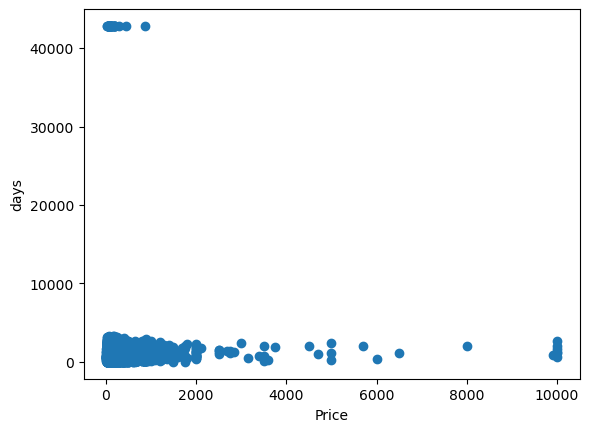

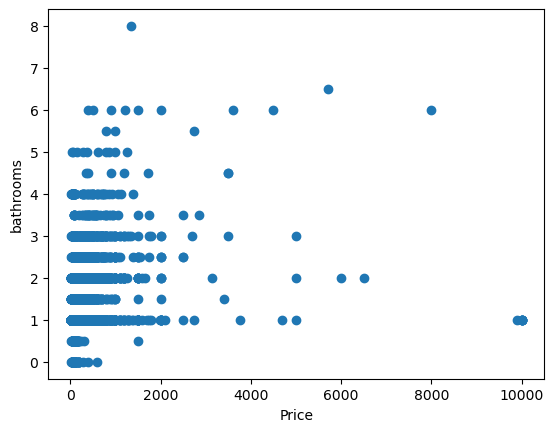

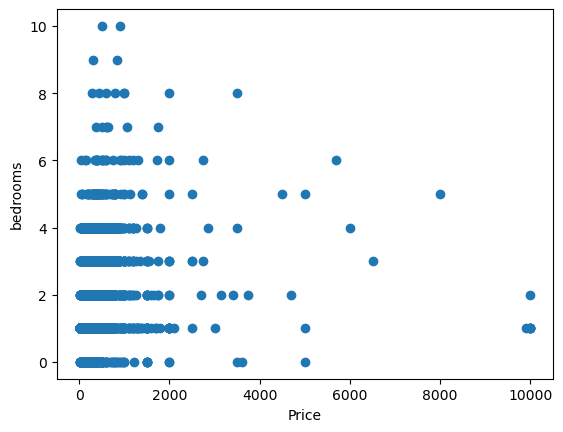

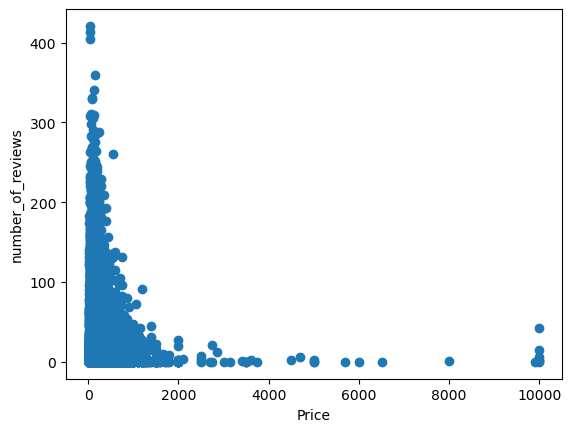

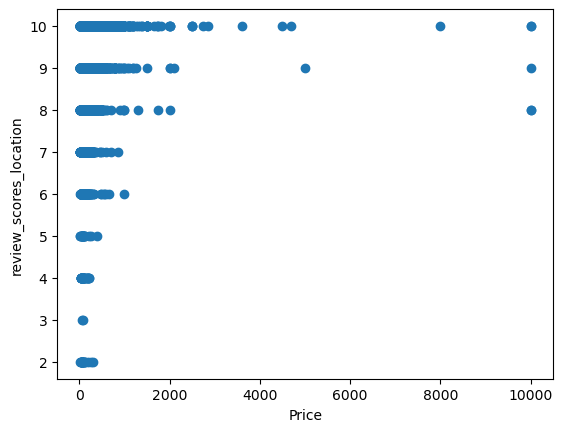

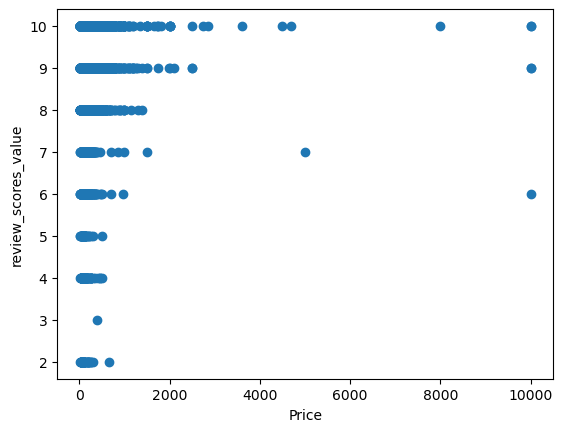

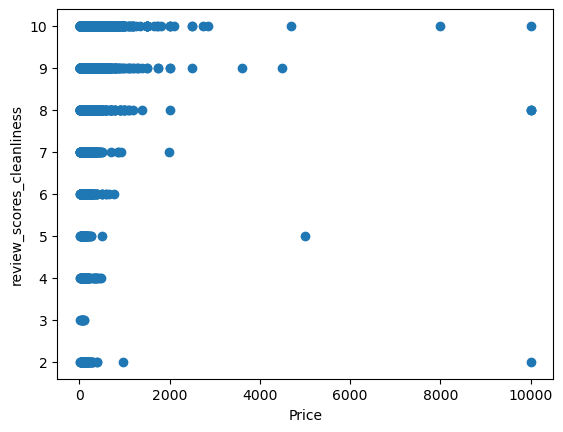

In [21]:
cols_of_interets = ['days','bathrooms','bedrooms','number_of_reviews','review_scores_location','review_scores_value','review_scores_cleanliness',]
for i in cols_of_interets:
    airbnb[i].describe()
    plt.scatter(airbnb['price'], airbnb[i])
    plt.xlabel('Price')
    plt.ylabel(i)
    plt.show()

In [22]:
airbnb['price_bins'] = pd.cut(airbnb['price'], bins=[0,500,5000, 10000], right=False)
airbnb['bathrooms_bins'] = pd.cut(airbnb['bathrooms'], bins=[0, 1, 2, 3, 4, 5, 6], right=False)
airbnb['bedrooms_bins'] = pd.cut(airbnb['bedrooms'], bins=[0, 1, 2, 3, 4, 5, 6], right=False)
airbnb['number_of_reviews_bins'] = pd.cut(airbnb['number_of_reviews'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=False)

/tmp/ipykernel_48080/364120488.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  bathroom_hist = pd.pivot_table(airbnb, index='bathrooms_bins', values='number_of_reviews', aggfunc=['mean'],margins=True,margins_name='Total')


,mean
,number_of_reviews
bathrooms_bins,
"[0, 1)",26.604061
"[1, 2)",15.846360
"[2, 3)",14.943998
"[3, 4)",17.843854
"[4, 5)",13.571429
"[5, 6)",16.923077
Total,15.837927


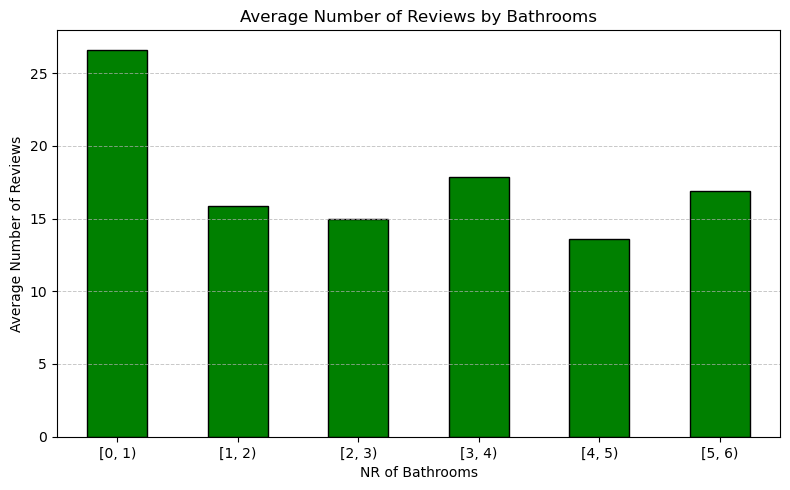

In [23]:
bathroom_hist = pd.pivot_table(airbnb, index='bathrooms_bins', values='number_of_reviews', aggfunc=['mean'],margins=True,margins_name='Total')
display(bathroom_hist)
plot_data_bathrooms = bathroom_hist.drop(index='Total')

# Plot
plot_data_bathrooms.plot(
    kind='bar',
    stacked=False,
    figsize=(8, 5),
    edgecolor='black',
    color =('green',),
)

# Add labels and title
plt.xlabel('NR of Bathrooms')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews by Bathrooms')
plt.legend().set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_48080/3684250169.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  price_hist = pd.pivot_table(airbnb, index='price_bins', values='number_of_reviews', aggfunc=['mean'],margins=True,margins_name='Total')


,mean
,number_of_reviews
bathrooms_bins,
"[0, 1)",26.604061
"[1, 2)",15.846360
"[2, 3)",14.943998
"[3, 4)",17.843854
"[4, 5)",13.571429
"[5, 6)",16.923077
Total,15.837927


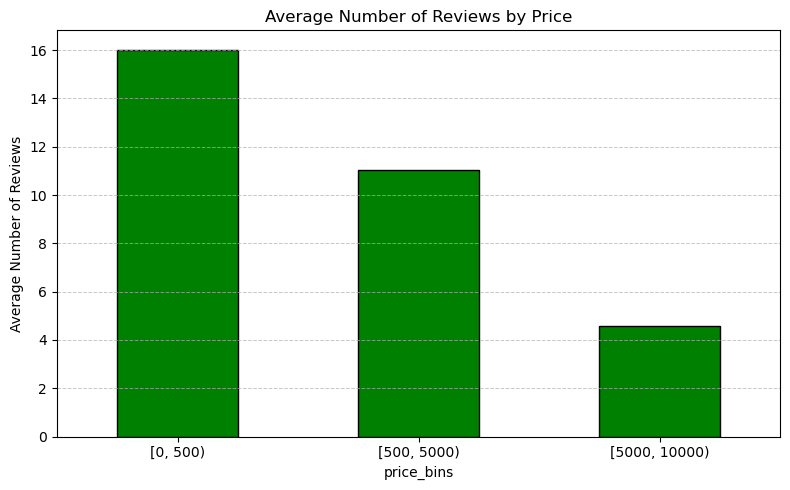

In [25]:
price_hist = pd.pivot_table(airbnb, index='price_bins', values='number_of_reviews', aggfunc=['mean'],margins=True,margins_name='Total')
display(bathroom_hist)
plot_data_price = price_hist.drop(index='Total')

# Plot
plot_data_price.plot(
    kind='bar',
    stacked=False,
    figsize=(8, 5),
    edgecolor='black',
    color =('green',),
)

# Add labels and title
plt.xlabel('price_bins')
plt.ylabel('Average Number of Reviews')
plt.title('Average Number of Reviews by Price')
plt.legend().set_visible(False)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

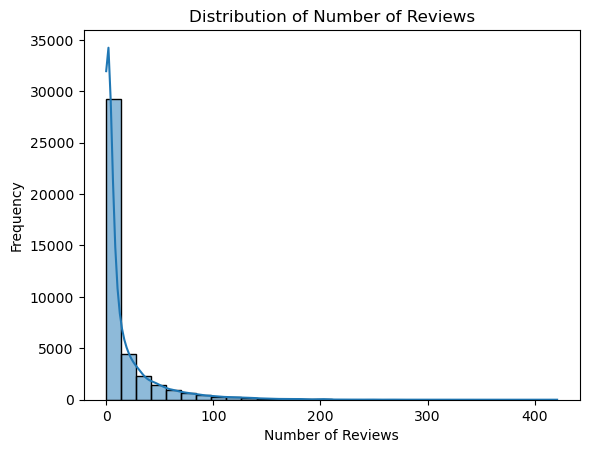

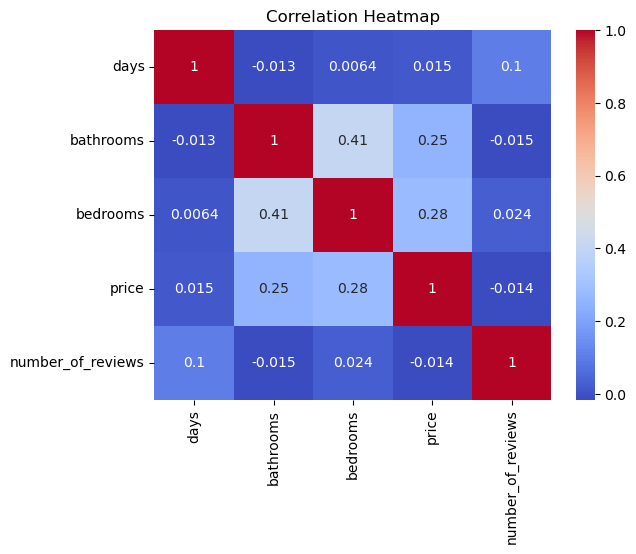

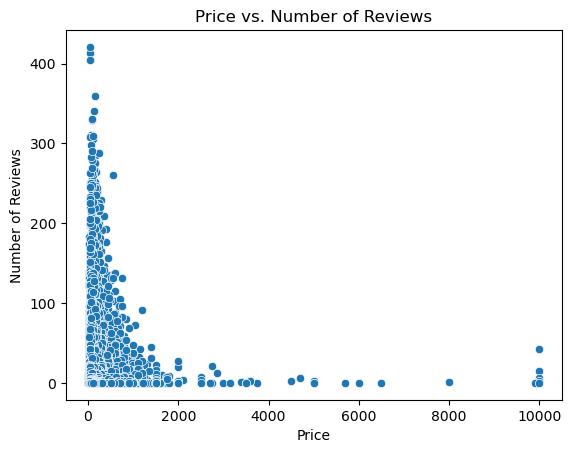

                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                40395
Model:                            GLM   Df Residuals:                    40391
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.2357e+05
Date:                Sun, 04 May 2025   Deviance:                   1.3240e+06
Time:                        15:54:33   Pearson chi2:                 2.16e+06
No. Iterations:                     6   Pseudo R-squ. (CS):            0.09222
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8149      0.004    694.031      0.0

In [26]:
import seaborn as sns
from statsmodels.api import GLM
from statsmodels.genmod.families import Poisson

# Step 1: Exploratory Data Analysis (EDA)

# Distribution of the number of reviews
sns.histplot(airbnb['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical variables
numerical_cols = ['days', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']
sns.heatmap(airbnb[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of price vs. number of reviews
sns.scatterplot(x='price', y='number_of_reviews', data=airbnb)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

# Step 2: Handle Missing Values
# Drop rows with missing values in relevant columns
relevant_cols = ['number_of_reviews', 'price', 'bathrooms', 'bedrooms']
airbnb_cleaned = airbnb.dropna(subset=relevant_cols)

# Step 3: Build a Poisson Regression Model

# Define dependent and independent variables
X = airbnb_cleaned[['price', 'bathrooms', 'bedrooms']]
X = sm.add_constant(X)  # Add intercept
y = airbnb_cleaned['number_of_reviews']

# Fit the Poisson regression model
poisson_model = GLM(y, X, family=Poisson()).fit()

# Step 4: Interpret Model Coefficients
print(poisson_model.summary())

# Interpretation:
# The coefficients represent the log change in the expected number of reviews for a one-unit increase in the predictor.
# For example, if the coefficient for `price` is -0.01, it means a one-unit increase in price decreases the expected number of reviews by approximately 1% (exp(-0.01) ≈ 0.99).

In [29]:
airbnb = airbnb[airbnb['price'] <= 500]


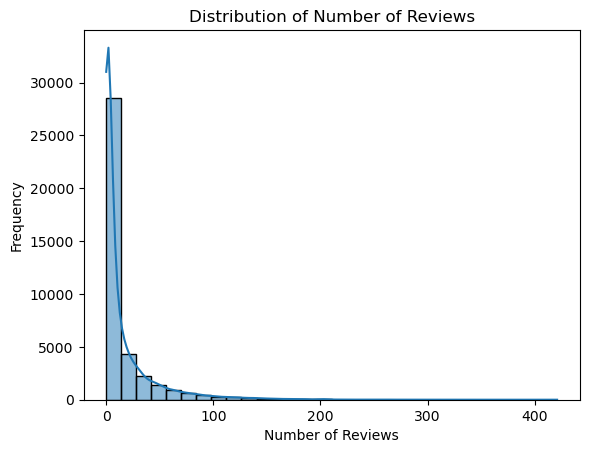

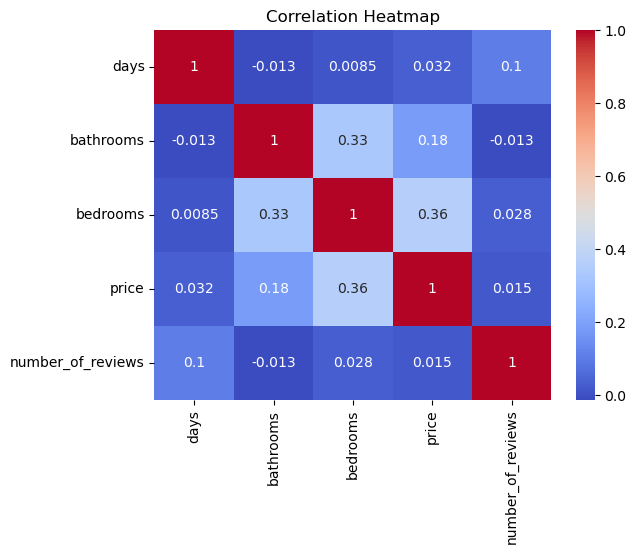

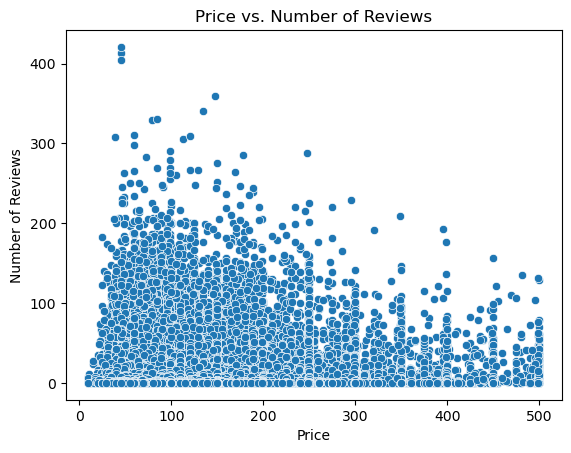

                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                39654
Model:                            GLM   Df Residuals:                    39650
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.1266e+05
Date:                Sun, 04 May 2025   Deviance:                   1.3039e+06
Time:                        16:00:24   Pearson chi2:                 2.13e+06
No. Iterations:                     6   Pseudo R-squ. (CS):            0.07089
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7975      0.005    620.600      0.0

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import GLM
from statsmodels.genmod.families import Poisson

# Step 1: Exploratory Data Analysis (EDA)

# Drop rows with missing values across all relevant columns (before plotting)
eda_cols = ['number_of_reviews', 'price', 'bathrooms', 'bedrooms', 'days']
airbnb_eda = airbnb.dropna(subset=eda_cols)

# Distribution of the number of reviews
sns.histplot(airbnb_eda['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical variables
numerical_cols = ['days', 'bathrooms', 'bedrooms', 'price', 'number_of_reviews']
sns.heatmap(airbnb_eda[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of price vs. number of reviews
sns.scatterplot(x='price', y='number_of_reviews', data=airbnb_eda)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

# Step 2: Clean data by dropping rows with missing values in model inputs
relevant_cols = ['number_of_reviews', 'price', 'bathrooms', 'bedrooms']
airbnb_cleaned = airbnb.dropna(subset=relevant_cols)

# Step 3: Build a Poisson Regression Model

# Define dependent and independent variables
X = airbnb_cleaned[['price', 'bathrooms', 'bedrooms']]
X = sm.add_constant(X)  # Add intercept
y = airbnb_cleaned['number_of_reviews']

# Fit the Poisson regression model
poisson_model = GLM(y, X, family=Poisson()).fit()

# Step 4: Interpret Model Coefficients
print(poisson_model.summary())
